# Stokes boundary layer

This problem assumes that a viscous liquid is being poured into a tank, which oscillates with a lateral speed $U(y=0,t)=U_0 \sin(2\pi ft)$. The problem will be analyzed using the vorticity-streamfunction formulation:

$$u=\frac{\partial{\psi}}{\partial{y}} \qquad v=-\frac{\partial{\psi}}{\partial{x}}$$

$$\vec{\omega}=\nabla\times\vec{u}=-\nabla^2\psi$$

$$\frac{\partial{\vec{\omega}}}{\partial{t}}+(\vec{u}\cdot\nabla)\vec{\omega}=\nu\nabla^2\vec{\omega}$$

For simplification, the following assumptions are made:

- There is no vertical velocity
- Flow is 2D with no body forces
- The horizontal velocity is constant in any horizontal plane
- There is a no-slip condition at y=0

These assumpyions lead to:

$$u=\frac{\partial{\psi}}{\partial{y}} \qquad v=-\frac{\partial{\psi}}{\partial{x}}=0$$

$$\omega=-\frac{\partial{u}}{\partial{y}}=-\frac{\partial^2{\psi}}{\partial{y^2}}$$

$$\frac{\partial{\omega}}{\partial{t}}=\nu\frac{\partial^2{\omega}}{\partial{y^2}}$$

## Initial conditions

Since the fluid is initially at rest, $u(y,t)=0$ everywhere, and the streamfunction is an arbitrary constant. We can therefore also choose the streamfunction to be identically zero at the beginning of the problem. The vorticity will be zero everywhere in the domain.

## Boundary conditions

We need two boundary conditions to cover the two spatial derivitives. The first is the no-slip condition for the tank bottom. The second will be the vorticity at the bottom. Taking a Taylor expansion of the stream function at the bottom of the tank:

$$\psi(y=\Delta{y},t)=\psi(y=0,t)+\frac{\partial{\psi}}{\partial{y}}\Delta{y}+\frac{\partial^2{\psi}}{\partial{y^2}}\frac{\Delta{y}^2}{2}+...$$

We have an expression for $u(y=0, t) = U_0 \sin(2\pi ft) = \frac{\partial \psi}{\partial y}$. Therefore, solving the above for the vorticity $\omega = -\frac{\partial^2 \psi}{\partial y^2}$:

$$\omega(y=0,t)\approx 2\left(\frac{U_0 \sin(2\pi ft)}{\Delta y}-\frac{\psi(y=\Delta y,t)}{\Delta y^2}\right)$$

## Non-dimensionalization

### Governing equations

We want to non-dimensionalize some of the parameters to simplify the analysis:
- $y\;[L] = \sqrt{\frac{\nu}{\Omega}}\hat{y}$
- $t\;[T] = \Omega^{-1}\hat{t}$ where $\Omega = 2\pi f$
- $u\;[LT^{-1}] = \sqrt{nu\Omega}\hat{u}$
- $\omega\;[T^{-1}] =\Omega\hat{\omega}$
- $\psi\;[L^2T^{-1}] = \nu\hat{\psi}$

The governing equations are therefore:

$$\frac{\partial{\hat{\psi}}}{\partial{\hat{y}}}=\hat{u} \qquad \frac{\partial{\hat{\psi}}}{\partial{\hat{x}}}=0$$

$$\hat{\omega} = -\frac{\partial{\hat{u}}}{\partial{\hat{y}}}=-\frac{\partial^2{\hat{\psi}}}{\partial{\hat{y}^2}}$$

$$\frac{\partial{\hat{\omega}}}{\partial{\hat{t}}}=\frac{\partial^2{\hat{\omega}}}{\partial{\hat{y}^2}}$$

### Initial conditions

The non-dimensional initial conditions are:

$$\hat{u}(\hat{y},\hat{t}=0)=\hat{\psi}(\hat{y},\hat{t}=0)=\hat{\omega}(\hat{y},\hat{t}=0)=0$$

### Boundary conditions
The non-dimensional initial conditions at $\hat{y}=0$ are:

$$\hat{u}(\hat{y}=0,\hat{t}) = H\sin(\hat{t})$$

$$\hat{\psi}(\hat{y}=0,\hat{t})=0$$

$$\hat{\omega}(\hat{y}=0,\hat{t})\approx 2\left(\frac{H \sin(\hat{t})}{\Delta \hat{y}}-\frac{\hat{\psi}(\hat{y}=\Delta \hat{y},\hat{t})}{\Delta \hat{y}^2}\right)$$

The $H$ term is non-dimensionalized velocity:

$$H \equiv \frac{U_0}{\sqrt{\nu\Omega}}=\sqrt{\frac{1}{2\pi}\left(\frac{U_0 L}{\nu}\right)\left(\frac{U_0}{fL}\right)}=\sqrt{\frac{Re}{2\pi St}}$$

## Discretization

Proceeding with finite differences, the vorticity transport equation is:

$$\hat{\omega}^{n+1}_{j}=\hat{\omega}^{n}_{j}+\frac{\Delta{\hat{t}}}{\Delta{\hat{y}^2}}\left(\hat{\omega}^{n}_{j+1}-2\hat{\omega}^{n}_{j}+\hat{\omega}^{n}_{j-1}\right)$$

The relationship between vorticity and the streamfunction is discretized as:

$$\left(\hat{\psi}^{n+1}_{j+1}-2\hat{\psi}^{n+1}_{j}+\hat{\psi}^{n+1}_{j-1}\right)=-{\Delta{\hat{y}^2}}\hat{\omega}^{n+1}_{j}$$

The vorticity can be solved explicitly by time-marching, but the streamfunction must be solved implicitly from the vorticity at the next time-step. The streamfunction can be found by constructing a matrix equation $[A][\hat{\psi}]=[B]$:

$$\left(\begin{array}{ccc} 
-2 & 1 & 0 & 0 & \cdots & 0 \\
1 & -2 & 1 & 0 & \cdots & 0 \\
0 & 1 & -2 & 1 & \cdots & 0 \\
\vdots & \vdots\ & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \cdots & 1 \\
0 & 0 & 0 & 0 & \cdots & -1 \\
\end{array}\right)\left(\begin{array}{ccc}
\hat{\psi}^{n+1}_{1} \\
\hat{\psi}^{n+1}_{2} \\
\hat{\psi}^{n+1}_{3} \\
\vdots \\
\hat{\psi}^{n+1}_{ny-1} \\
\hat{\psi}^{n+1}_{ny} \end{array}\right)=-\Delta{\hat{y}^2}\left(\begin{array}{ccc}
\hat{\omega}^{n+1}_{1} \\
\hat{\omega}^{n+1}_{2} \\
\hat{\omega}^{n+1}_{3} \\
\vdots \\
\hat{\omega}^{n+1}_{ny-1} \\
\hat{\omega}^{n+1}_{ny} \end{array}\right)$$

The first row starts at $i=1$ and not $i=0$ because of the boundary condition imposed there. The last row contains $-1$ instead of $-2$ because for sufficiently large $y$, $\hat{\psi}^{n+1}_{ny+1}\approx\hat{\psi}^{n+1}_{ny}$. Therefore:

$$-\Delta{\hat{y}^2}\hat{\omega}^{n+1}_{ny}=\left(\hat{\psi}^{n+1}_{ny+1}-2\hat{\psi}^{n+1}_{ny}+\hat{\psi}^{n+1}_{ny-1}\right)\approx\left(\hat{\psi}^{n+1}_{ny}-2\hat{\psi}^{n+1}_{ny}+\hat{\psi}^{n+1}_{ny-1}\right)=\left(-\hat{\psi}^{n+1}_{ny}+\hat{\psi}^{n+1}_{ny-1}\right)$$

In [1]:
# Solve [A][X] = [B]
def coeff_mat(N):
    import numpy as np
    d = -2*np.ones(N)    # main diagonal
    d[N-1] = -1          # last element of main diagonal
    d_n = np.copy(d)
    l = np.ones(N-1)     # lower diagonal
    u = np.ones(N-1)     # upper diagonal
    
    # Forward elimination of lower-diagonal elements
    for i in range(1, N):
        d_n[i] = d[i] - u[i-1]*l[i-1]/d_n[i-1]
    
    return l, d_n, u

In [2]:
def thomas_algo(B, l, d_n, u):
    import numpy as np
    N = np.size(B)
    
    # Thomas algorithm
    # Forward elimination of lower-diagonal elements
    for i in range(1, N):
        B[i] = B[i] - B[i-1]*l[i-1]/d_n[i-1]
        
    X = np.zeros_like(B)
    # Backward substitution
    X[-1] = B[-1]/d_n[-1]
    for i in range(N-2, -1, -1):
        X[i] = (B[i] - u[i]*X[i+1])/d_n[i]
    return X

In [13]:
def solver(vor, sfn, nt, dt, ny, dy, H):
    start = time.time()
    vor_n = np.copy(vor)
    sfn_n = np.copy(sfn)
    
    # Create the coefficient matrix A
    l, d_n, u = coeff_mat(ny-1)
    
    for i in range(1, int(nt+1)):
        # Time-marching for vorticity transport equation
        vor_n[1:-1] = vor[1:-1] + dt/dy**2 * (vor[2:] - 2*vor[1:-1] + vor[:-2])
        
        # Implicit solution of the streamfunction
        B = -vor_n[1:]*dy**2
        sfn_n[1:] = thomas_algo(B, l, d_n, u)
        vor_n[0] = 2 * (H*np.sin(i*dt) - sfn_n[1]/dy)/dy   # Vorticity boundary condition at y = 0
        vor = np.copy(vor_n)
        
    # Solve for velocity
    u = np.zeros(ny)
    u[0] = H * np.sin(nt*dt)
    u[1:-1] = (sfn_n[2:]-sfn_n[:-2])/(2*dy)
    u[-1] = 0      # v_inf, zero
    
    # For reference, the analytical solutions are below
    ## vorticity
    r = np.sqrt(1./2.)
    tt = nt*dt # total time
    vor_a = H*r*np.exp(-r*y)*(np.sin(tt-r*y)+np.cos(tt-r*y))
    ## streamfunction
    sfn_a = H*r*(np.exp(-r*y)*(np.cos(tt-r*y)-np.sin(tt-r*y))-(np.cos(tt)-np.sin(tt)))
    ## velocity
    u_a = H*np.exp(-r*y)*np.sin(tt-r*y)
    
    finish = time.time()
    print(f'Simulation complete in {finish-start:.2f} seconds')
    
    return vor, sfn_n, u, vor_a, sfn_a, u_a

In [16]:
import numpy as np
import time
import matplotlib.pyplot as plt
Y = 15   # domain in characteristic lengths
ny = 201
dy = Y/(ny-1)
y = np.linspace(0, Y, ny)

dt = 0.001

nu = 0.01
U0 = 1.
f = 1.
w = 2*np.pi*f
H = U0/np.sqrt(nu*w)
print(f'H = {H:.2f}')
CFL = dt/dy**2
if CFL <= 0.5:
    print(f'CFL = {CFL:.2f}, CFL is ok')
else:
    print('CFL too high. Numerical instability is expected.')

# Initial conditions
vor_0 = np.zeros(ny)
sfn_0 = np.zeros(ny)

ntpc = int(2*np.pi/dt)

vor_1, sfn_1, u_1, vor_1a, sfn_1a, u_1a = solver(vor_0,sfn_0,ntpc/10,dt,ny,dy,H) # solve for 10% of 1st cycle
vor_2, sfn_2, u_2, vor_2a, sfn_2a, u_2a = solver(vor_0,sfn_0,ntpc/2,dt,ny,dy,H) # solve for 50% of 1st cycle
vor_3, sfn_3, u_3, vor_3a, sfn_3a, u_3a = solver(vor_0,sfn_0,ntpc,dt,ny,dy,H) # solve for 1st cycle
vor_4, sfn_4, u_4, vor_4a, sfn_4a, u_4a = solver(vor_3,sfn_3,ntpc,dt,ny,dy,H) # solve for 2nd cycle
vor_5, sfn_5, u_5, vor_5a, sfn_5a, u_5a = solver(vor_4,sfn_4,3*ntpc,dt,ny,dy,H) # solve for 5th cycle
vor_6, sfn_6, u_6, vor_6a, sfn_6a, u_6a = solver(vor_5,sfn_5,5*ntpc,dt,ny,dy,H) # solve for 10th cycle

H = 3.99
CFL = 0.18, CFL is ok
Simulation complete in 0.24 seconds
Simulation complete in 1.21 seconds
Simulation complete in 2.39 seconds
Simulation complete in 2.38 seconds
Simulation complete in 7.29 seconds
Simulation complete in 12.17 seconds


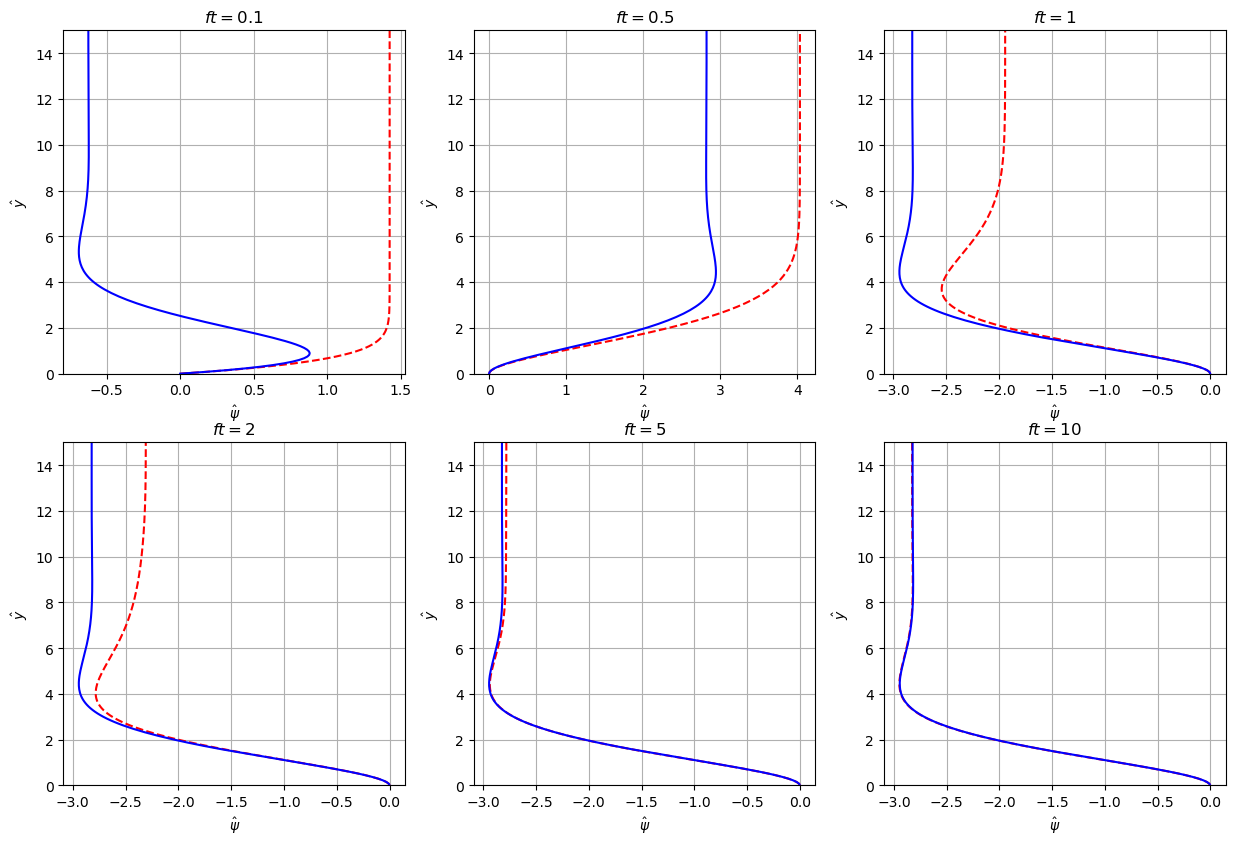

In [17]:
# Plotting the computed and analytical streamfunctions
fig = plt.figure(figsize=(15,10), dpi=100)
fig.add_subplot(231)
plt.plot(sfn_1,y,'--r',sfn_1a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.1$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(232)
plt.plot(sfn_2,y,'--r',sfn_2a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.5$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(233)
plt.plot(sfn_3,y,'--r',sfn_3a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=1$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(234)
plt.plot(sfn_4,y,'--r',sfn_4a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=2$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(235)
plt.plot(sfn_5,y,'--r',sfn_5a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=5$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(236)
plt.plot(sfn_6,y,'--r',sfn_6a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=10$'), plt.xlabel('$\hat{\psi}$'), plt.ylabel('$\hat{y}$')

plt.show()

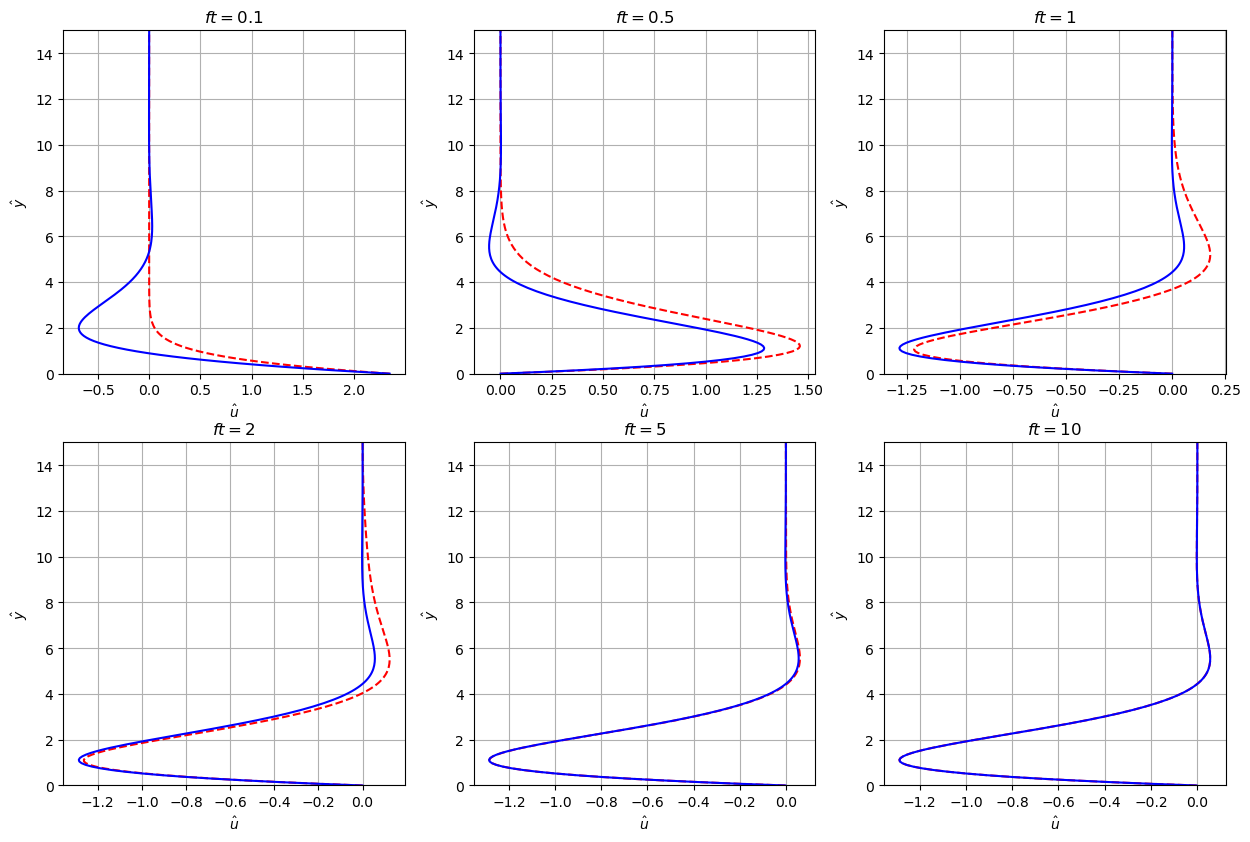

In [18]:
# Plotting computed and analytical velocities
fig = plt.figure(figsize=(15,10), dpi=100)
fig.add_subplot(231)
plt.plot(u_1,y,'--r',u_1a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.1$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(232)
plt.plot(u_2,y,'--r',u_2a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=0.5$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(233)
plt.plot(u_3,y,'--r',u_3a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=1$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(234)
plt.plot(u_4,y,'--r',u_4a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=2$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(235)
plt.plot(u_5,y,'--r',u_5a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=5$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')
fig.add_subplot(236)
plt.plot(u_6,y,'--r',u_6a,y,'-b'), plt.grid(True), plt.ylim((0,Y))
plt.title('$ft=10$'), plt.xlabel('$\hat{u}$'), plt.ylabel('$\hat{y}$')

plt.show()